In [1]:
import sys
sys.path.append('/Users/dmitry/Desktop/Thesis/Libs')

In [6]:
import tensorflow as tf

from scenarios import run_AL_SBC_SUD
from queries import query_entropy_sud
from models import create_sequential_model
from reshapes import reshape_mnist
from scores import score_sequential
from encoders import get_mnist_encoder, get_fmnist_encoder

In [3]:
import datasets as ds
x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist = ds.get_mnist()

In [4]:
mnist_encoder = get_mnist_encoder()

In [5]:
INIT_SIZE = 2000
BATCH_SIZE = 1
TRAIN_SIZE = 10000
QUERIES_NUMBER = 130

In [7]:
mnist_sbc_sud_stat = []
for i in range(5):
    sbc_sud_mnist = run_AL_SBC_SUD(query_entropy_sud, create_sequential_model, reshape_mnist, score_sequential, 
                            x_train_mnist, 
                            y_train_mnist, 
                            x_test_mnist, 
                            y_test_mnist,
                            INIT_SIZE, BATCH_SIZE, TRAIN_SIZE, QUERIES_NUMBER, i, mnist_encoder)
    mnist_sbc_sud_stat.append(sbc_sud_mnist)

=== Start model initialization ===
=== Finish model initialization ===
=== SUD learning started === 


100% (130 of 130) |######################| Elapsed Time: 0:38:30 Time:  0:38:30


=== SUD learning finished ===
=== Start model initialization ===
=== Finish model initialization ===
=== SUD learning started === 


100% (130 of 130) |######################| Elapsed Time: 0:41:35 Time:  0:41:35


=== SUD learning finished ===
=== Start model initialization ===
=== Finish model initialization ===
=== SUD learning started === 


100% (130 of 130) |######################| Elapsed Time: 0:41:20 Time:  0:41:20


=== SUD learning finished ===
=== Start model initialization ===
=== Finish model initialization ===
=== SUD learning started === 


100% (130 of 130) |######################| Elapsed Time: 0:41:12 Time:  0:41:12


=== SUD learning finished ===
=== Start model initialization ===
=== Finish model initialization ===
=== SUD learning started === 


100% (130 of 130) |######################| Elapsed Time: 0:40:57 Time:  0:40:57


=== SUD learning finished ===


In [8]:
import pickle
with open('mnist_sbc_sud_stat.pkl', 'wb') as f:
    pickle.dump(mnist_sbc_sud_stat, f)

In [9]:
file = open('mnist_init_size_stat.pkl', 'rb')
mnist_entropy_stat = pickle.load(file)['entropy'][2000]

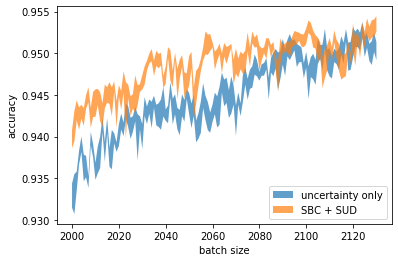

In [11]:
import matplotlib.pyplot as plt
from plots import plot_conf_int

plot_conf_int(mnist_entropy_stat, "uncertainty only")
plot_conf_int(mnist_sbc_sud_stat, "SBC + SUD")
plt.xlabel('batch size')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()